In [1]:
# Python 3.x Utility Functions
# From https://github.com/norvig/pytudes/blob/master/ipynb/Advent 2017.ipynb

import re
import numpy as np
import math
import random
import urllib.request

from collections import Counter, defaultdict, namedtuple, deque, abc, OrderedDict
from functools   import lru_cache
from itertools   import (permutations, combinations, chain, cycle, product, islice, 
                         takewhile, zip_longest, count as count_from)
from heapq       import heappop, heappush

identity = lambda x: x
letters  = 'abcdefghijklmnopqrstuvwxyz'

cat = ''.join

Ø   = frozenset() # Empty set
inf = float('inf')
BIG = 10 ** 999

In [2]:
#Read example
top = []
bottom = []
weight = {}

with open('example.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
            weight[line[0]] = int(line[1])
        print(line)
        

['pbga', '66']
['xhth', '57']
['ebii', '61']
['havc', '66']
['ktlj', '57']
['fwft', '72', ['ktlj', 'cntj', 'xhth']]
['qoyq', '66']
['padx', '45', ['pbga', 'havc', 'qoyq']]
['tknk', '41', ['ugml', 'padx', 'fwft']]
['jptl', '61']
['ugml', '68', ['gyxo', 'ebii', 'jptl']]
['gyxo', '61']
['cntj', '57']


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
G = nx.DiGraph()

In [5]:
G.add_nodes_from([x for x, y in top])
G.add_nodes_from([x for x, y, z in bottom])

In [6]:
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))

In [7]:
G.add_edges_from(edges)

In [8]:
G.out_edges()

OutEdgeView([('fwft', 'ktlj'), ('fwft', 'cntj'), ('fwft', 'xhth'), ('padx', 'pbga'), ('padx', 'havc'), ('padx', 'qoyq'), ('tknk', 'ugml'), ('tknk', 'padx'), ('tknk', 'fwft'), ('ugml', 'gyxo'), ('ugml', 'ebii'), ('ugml', 'jptl')])

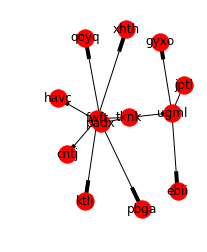

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(G, with_labels=True)


In [10]:
[(x, y) for x, y in G.in_degree if y == 0]

[('tknk', 0)]

In [11]:
#Read input.txt
top = []
bottom = []
weight = {}

with open('input.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
            weight[line[0]] = int(line[1])
        
        

In [12]:
G = nx.DiGraph()
G.add_nodes_from([x for x, y in top])
G.add_nodes_from([x for x, y, z in bottom])
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))
G.add_edges_from(edges)

In [207]:
[(x, y) for x, y in G.in_degree if y == 0]

[('vvsvez', 0)]

## Part 2

In [201]:
#Read example
top = []
bottom = []
weight = {}

with open('example.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
            weight[line[0]] = int(line[1])
        print(line)
        
G = nx.DiGraph()
G.add_nodes_from([x for x, y in top], weight = 0)
G.add_nodes_from([x for x, y, z in bottom], weight = 0)
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))
G.add_edges_from(edges)

['pbga', '66']
['xhth', '57']
['ebii', '61']
['havc', '66']
['ktlj', '57']
['fwft', '72', ['ktlj', 'cntj', 'xhth']]
['qoyq', '66']
['padx', '45', ['pbga', 'havc', 'qoyq']]
['tknk', '41', ['ugml', 'padx', 'fwft']]
['jptl', '61']
['ugml', '68', ['gyxo', 'ebii', 'jptl']]
['gyxo', '61']
['cntj', '57']


In [202]:
weight = {**{x: int(y) for x, y in top},**{x: int(y) for x, y, z in bottom}}

In [203]:
nx.set_node_attributes(G, weight, 'weight')
nx.set_node_attributes(G, weight, 'totalweight')

In [204]:
G.node['ktlj']['weight']

57

In [180]:
weight

{'cntj': 57,
 'ebii': 61,
 'fwft': 72,
 'gyxo': 61,
 'havc': 66,
 'jptl': 61,
 'ktlj': 57,
 'padx': 45,
 'pbga': 66,
 'qoyq': 66,
 'tknk': 41,
 'ugml': 68,
 'xhth': 57}

In [181]:
endpoints = [x  for x, y in G.out_degree if y == 0]

In [182]:
nx.get_node_attributes(G, 'totalweight')

{'cntj': 57,
 'ebii': 61,
 'fwft': 72,
 'gyxo': 61,
 'havc': 66,
 'jptl': 61,
 'ktlj': 57,
 'padx': 45,
 'pbga': 66,
 'qoyq': 66,
 'tknk': 41,
 'ugml': 68,
 'xhth': 57}

In [183]:
endpoints

['pbga', 'xhth', 'ebii', 'havc', 'ktlj', 'qoyq', 'jptl', 'gyxo', 'cntj']

In [184]:
prevpoints = endpoints
middlepoints = []
kids_weight = 0
while True:
    middlepoints = set(chain.from_iterable([G.predecessors(x) for x in prevpoints]))
    if len(middlepoints) == 0:
        break
    for node_middle in middlepoints:
        succ_list = list(G.successors(node_middle))
        for succ in succ_list:
            current_kid_weight = G.node[succ]['totalweight']
            if kids_weight == 0:
                kids_weight = current_kid_weight
            else:
                if kids_weight != current_kid_weight:
                    print('Error:' + str(kids_weight - current_kid_weight))
                    break
            G.node[node_middle]['totalweight'] += current_kid_weight
        kids_weight = 0
    prevpoints = middlepoints   
    

Error8


In [263]:
#Read input
top = []
bottom = []
weight = {}

with open('input.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
            weight[line[0]] = int(line[1])
        
G = nx.DiGraph()
G.add_nodes_from([x for x, y in top], weight = 0)
G.add_nodes_from([x for x, y, z in bottom], weight = 0)
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))
G.add_edges_from(edges)

weight = {**{x: int(y) for x, y in top},**{x: int(y) for x, y, z in bottom}}
nx.set_node_attributes(G, weight, 'weight')
nx.set_node_attributes(G, weight, 'totalweight')

In [264]:
def buscanfat(Graph):
    endpoints = [x  for x, y in Graph.out_degree if y == 0]
    prevpoints = endpoints
    middlepoints = []
    kids_weight = 0
    while True:
        middlepoints = set(chain.from_iterable([Graph.predecessors(x) for x in prevpoints]))
        if len(middlepoints) == 0:
            return None
        for node_middle in middlepoints:
            succ_list = list(Graph.successors(node_middle))
            for succ in succ_list:
                current_kid_weight = Graph.node[succ]['totalweight']
                if kids_weight == 0:
                    kids_weight = current_kid_weight
                else:
                    if kids_weight != current_kid_weight:
                        print(node_middle)
                        print(kids_weight)
                        print(current_kid_weight)
                        exit = 'Error:' + str(kids_weight - current_kid_weight)
                        return exit
                Graph.node[node_middle]['totalweight'] += current_kid_weight
            kids_weight = 0
        prevpoints = middlepoints   
    

In [265]:
list(G.successors(list(set(chain.from_iterable([G.predecessors(x) for x in [x  for x, y in G.out_degree if y == 0]])))[0]))

['xxemgkm', 'havvqw']

In [266]:
buscanfat(G)

czvcms
191
11


'Error:180'

In [268]:
G.node['czvcms']['weight']

1990

In [252]:
kids_weight - current_kid_weight

-155458

In [262]:
1990 - 180

1810